# Library

In [1]:
pip install transformers datasets torch accelerate librosa numpy scikit-learn keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410

In [2]:
!kaggle datasets download -d mansourehk/shemo-persian-speech-emotion-detection-database

Dataset URL: https://www.kaggle.com/datasets/mansourehk/shemo-persian-speech-emotion-detection-database
License(s): unknown
 99% 819M/829M [00:11<00:00, 93.4MB/s]
100% 829M/829M [00:11<00:00, 74.8MB/s]


In [3]:
!unzip shemo-persian-speech-emotion-detection-database.zip

Streaming output truncated to the last 5000 lines.
  inflating: transcript/final script/F24A22.tra  
  inflating: transcript/final script/F24A23.tra  
  inflating: transcript/final script/F24A24.tra  
  inflating: transcript/final script/F24A25.tra  
  inflating: transcript/final script/F24A26.tra  
  inflating: transcript/final script/F24A27.tra  
  inflating: transcript/final script/F24A28.tra  
  inflating: transcript/final script/F24A29.tra  
  inflating: transcript/final script/F24A30.tra  
  inflating: transcript/final script/F24A31.tra  
  inflating: transcript/final script/F24A32.tra  
  inflating: transcript/final script/F24A33.tra  
  inflating: transcript/final script/F24A34.tra  
  inflating: transcript/final script/F24A35.tra  
  inflating: transcript/final script/F24A36.tra  
  inflating: transcript/final script/F24A37.tra  
  inflating: transcript/final script/F24A38.tra  
  inflating: transcript/final script/F24A39.tra  
  inflating: transcript/final script/F24A40.tra  

In [4]:
!mkdir dataset
!mv female dataset
!mv male dataset

In [5]:
import os
import pandas as pd
# Path to your dataset folders (male and fema|le)
male_folder = '/content/dataset/male'
female_folder = '/content/dataset/female'

# Dictionary to store information
data_info = {
    'male': [],
    'female': []
}

# Function to extract information from the file names
def extract_info(file_path):
    file_info = {}
    filename = os.path.basename(file_path)  # Extract filename from the path
    file_info['gender'] = filename[0]  # Extracting the gender (M or F)
    file_info['speaker_code'] = filename[1:3]  # Extracting the speaker code
    file_info['emotion'] = filename[3]  # Extracting the emotion code
    file_info['utterance_number'] = filename[4:]  # Extracting the utterance number
    file_info['path'] = file_path  # Storing the complete file path
    return file_info

data = []

# Process male folder
for filename in os.listdir(male_folder):
    file_path = os.path.join(male_folder, filename)
    file_info = extract_info(file_path)
    data.append(file_info)

# Process female folder
for filename in os.listdir(female_folder):
    file_path = os.path.join(female_folder, filename)
    file_info = extract_info(file_path)
    data.append(file_info)

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

     gender speaker_code emotion utterance_number  \
0         M           28       A           47.wav   
1         M           25       A           65.wav   
2         M           26       A           22.wav   
3         M           28       N           12.wav   
4         M           27       N           51.wav   
...     ...          ...     ...              ...   
2995      F           21       A           18.wav   
2996      F           01       A           14.wav   
2997      F           01       F           03.wav   
2998      F           22       F           01.wav   
2999      F           09       S           09.wav   

                                    path  
0       /content/dataset/male/M28A47.wav  
1       /content/dataset/male/M25A65.wav  
2       /content/dataset/male/M26A22.wav  
3       /content/dataset/male/M28N12.wav  
4       /content/dataset/male/M27N51.wav  
...                                  ...  
2995  /content/dataset/female/F21A18.wav  
2996  /content/data

In [6]:

import librosa

# Function to calculate duration in seconds for an audio file
def get_duration(file_path):
    audio, sr = librosa.load(file_path)
    duration_sec = librosa.get_duration(y=audio, sr=sr)
    return duration_sec

# Assuming 'df' contains a column named 'path' with file paths
# Add a new column 'duration_sec' to store voice durations
df['duration_sec'] = df['path'].apply(lambda x: get_duration(x))


# Data viz

In [7]:
df.head()

,gender,speaker_code,emotion,utterance_number,path,duration_sec
0,M,28,A,47.wav,/content/dataset/male/M28A47.wav,1.673832
1,M,25,A,65.wav,/content/dataset/male/M25A65.wav,2.308617
2,M,26,A,22.wav,/content/dataset/male/M26A22.wav,1.582404
3,M,28,N,12.wav,/content/dataset/male/M28N12.wav,2.565624
4,M,27,N,51.wav,/content/dataset/male/M27N51.wav,5.281723


In [8]:
df.describe(include='all')

,gender,speaker_code,emotion,utterance_number,path,duration_sec
count,3000,3000,3000,3000,3000,3000.000000
unique,2,56,6,87,3000,NaN
top,M,12,A,01.wav,/content/dataset/male/M28A47.wav,NaN
freq,1737,208,1059,341,1,NaN
mean,NaN,NaN,NaN,NaN,NaN,4.111807
std,NaN,NaN,NaN,NaN,NaN,3.414900
min,NaN,NaN,NaN,NaN,NaN,0.358639
25%,NaN,NaN,NaN,NaN,NaN,1.955113
50%,NaN,NaN,NaN,NaN,NaN,3.079637
75%,NaN,NaN,NaN,NaN,NaN,5.104093


In [9]:
# Value counts for the 'gender' column
gender_counts = df['gender'].value_counts()

# Display the value counts for gender
print(gender_counts)

gender
M    1737
F    1263
Name: count, dtype: int64


In [10]:
# Value counts for the 'gender' column
gender_counts = df['emotion'].value_counts()

# Display the value counts for gender
print(gender_counts)


emotion
A    1059
N    1028
S     449
W     225
H     201
F      38
Name: count, dtype: int64


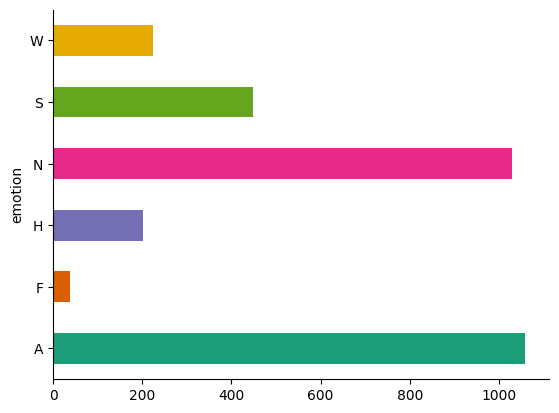

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

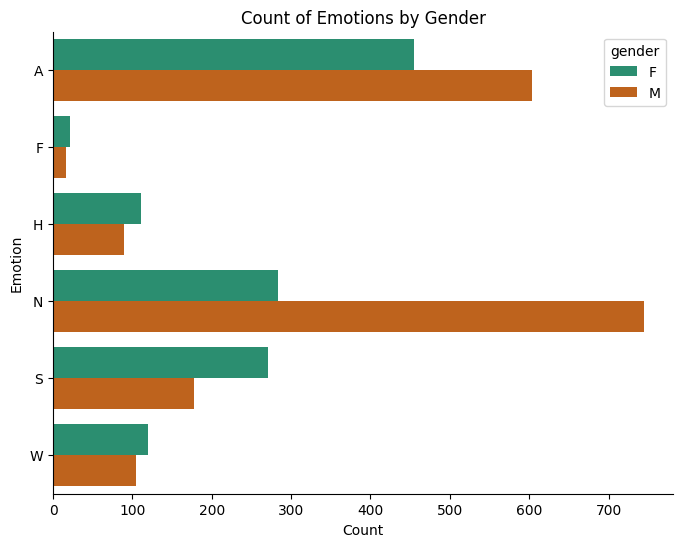

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns

# Assuming 'df' contains your DataFrame with columns 'gender' and 'emotion'

# Grouping by 'gender' and 'emotion', then counting occurrences
grouped = df.groupby(['gender', 'emotion']).size().reset_index(name='count')

# Plotting the grouped bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='count', y='emotion', hue='gender', data=grouped, palette='Dark2')

# Removing the spines (top and right)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Emotion')
plt.title('Count of Emotions by Gender')

plt.show()


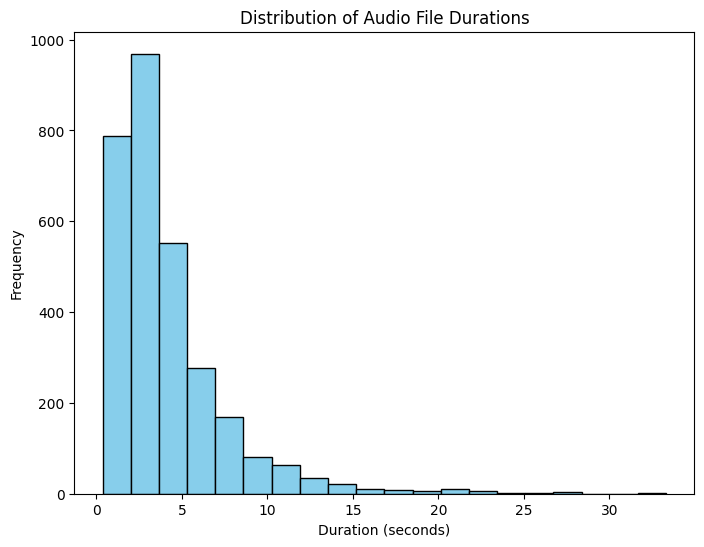

In [13]:
import matplotlib.pyplot as plt

# Plotting a histogram of durations
plt.figure(figsize=(8, 6))
plt.hist(df['duration_sec'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Audio File Durations')
plt.show()

<ipython-input-14-5ac246d5e1cc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='emotion', y='duration_sec', data=df, palette='Set2')


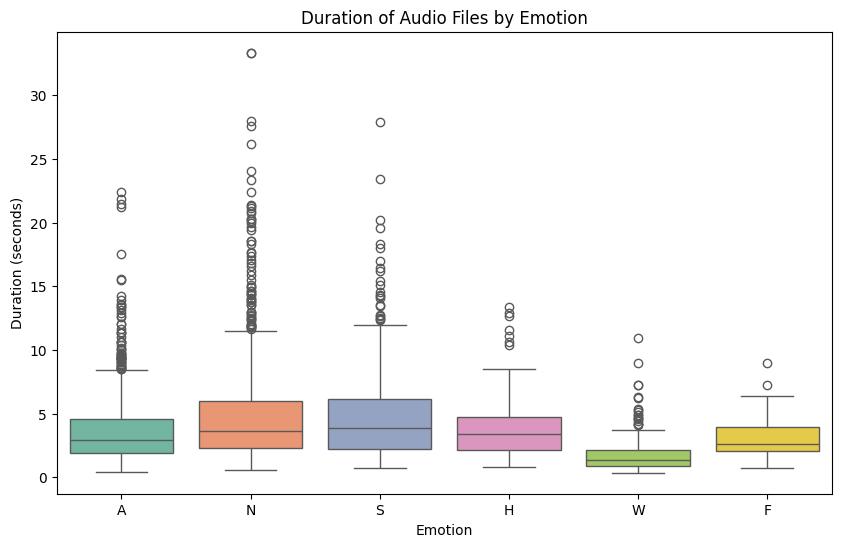

In [14]:
import seaborn as sns

# Boxplot of duration by emotion
plt.figure(figsize=(10, 6))
sns.boxplot(x='emotion', y='duration_sec', data=df, palette='Set2')
plt.xlabel('Emotion')
plt.ylabel('Duration (seconds)')
plt.title('Duration of Audio Files by Emotion')
plt.show()




<ipython-input-15-df8741574bfb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='duration_sec', data=df, palette='Pastel1')


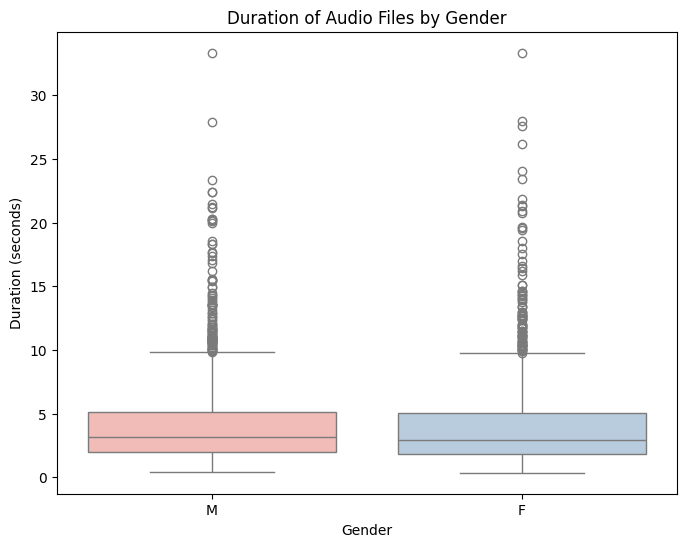

In [15]:

# Boxplot of duration by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='duration_sec', data=df, palette='Pastel1')
plt.xlabel('Gender')
plt.ylabel('Duration (seconds)')
plt.title('Duration of Audio Files by Gender')
plt.show()

# Fine-tune pre-trained model


In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['labels'] = label_encoder.fit_transform(df['emotion'])

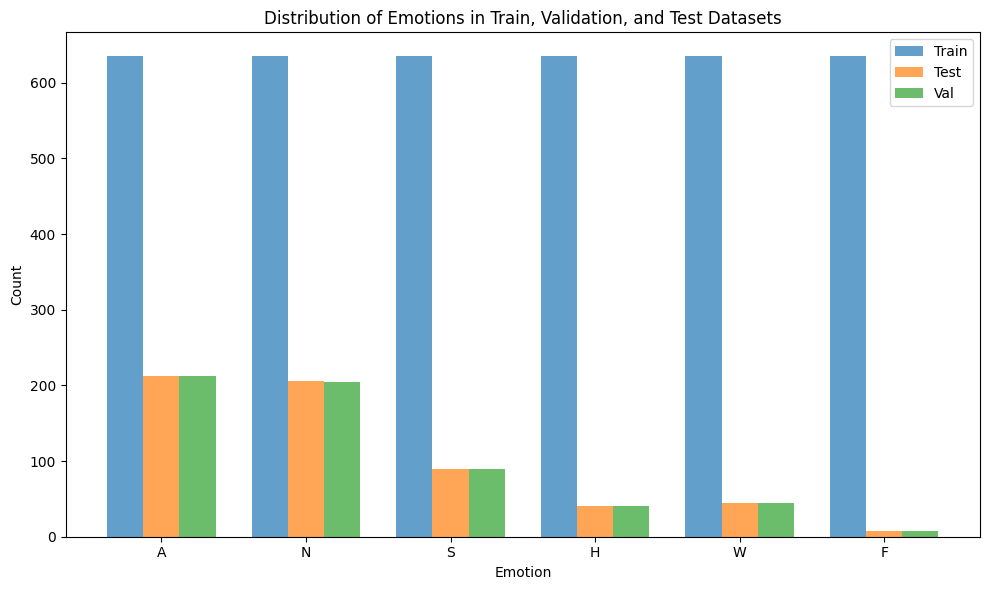

In [17]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Assuming 'df' contains your DataFrame with 'emotion' as the target column
# Splitting the data into train (60%), validation (20%), and test (20%) while preserving the distribution of 'emotion'
train_df, test_val_df = train_test_split(df, test_size=0.4, stratify=df['emotion'])
test_df, val_df = train_test_split(test_val_df, test_size=0.5, stratify=test_val_df['emotion'])

# Oversample the training dataset only
ros = RandomOverSampler()

train_features, train_labels = train_df.drop(columns=['emotion']), train_df['emotion']
train_features_resampled, train_labels_resampled = ros.fit_resample(train_features, train_labels)
train_df = pd.concat([train_features_resampled, train_labels_resampled], axis=1)

# Get unique emotions
emotions = df['emotion'].unique()
num_emotions = len(emotions)

# Calculate emotion counts in train, validation, and test datasets
train_emotion_counts = train_df['emotion'].value_counts().reindex(emotions, fill_value=0)
test_emotion_counts = test_df['emotion'].value_counts().reindex(emotions, fill_value=0)
val_emotion_counts = val_df['emotion'].value_counts().reindex(emotions, fill_value=0)

# Set the positions for bars
bar_width = 0.25
index = np.arange(num_emotions)

# Plotting the distribution of emotions in train, validation, and test datasets side by side
plt.figure(figsize=(10, 6))
plt.bar(index, train_emotion_counts.values, alpha=0.7, label='Train', width=bar_width)
plt.bar(index + bar_width, test_emotion_counts.values, alpha=0.7, label='Test', width=bar_width)
plt.bar(index + 2 * bar_width, val_emotion_counts.values, alpha=0.7, label='Val', width=bar_width)

plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Distribution of Emotions in Train, Validation, and Test Datasets')
plt.xticks(index + bar_width, emotions)  # Set x-axis labels
plt.legend()
plt.tight_layout()
plt.show()


## HuBert base

In [18]:
# Define the map_to_array function
from transformers import Wav2Vec2FeatureExtractor
from datasets import Dataset
import librosa
def map_to_array(example):
    speech, _ = librosa.load(example["path"], sr=16000, mono=True)
    example["speech"] = speech
    return example

# Assuming train_df, test_df, val_df are pandas DataFrames with 'path' and 'labels' columns
train_data = Dataset.from_pandas(train_df).map(map_to_array)
test_data = Dataset.from_pandas(test_df).map(map_to_array)
val_data = Dataset.from_pandas(val_df).map(map_to_array)

# Preprocessing function to extract features
def preprocess_function(examples):
    audio = examples["speech"]
    inputs = feature_extractor(audio, sampling_rate=16000, padding=True, truncation=True,max_length=16000)
    inputs["labels"] = examples["labels"]
    return inputs

# Apply preprocessing
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("facebook/hubert-base-ls960")

train_encodings = train_data.map(preprocess_function, remove_columns="speech", batched=True)
test_encodings = test_data.map(preprocess_function, remove_columns="speech", batched=True)
val_encodings = val_data.map(preprocess_function, remove_columns="speech", batched=True)

train_dataset = train_encodings.with_format("torch")
test_dataset = test_encodings.with_format("torch")
val_dataset = val_encodings.with_format("torch")



Map:   0%|          | 0/3810 [00:00<?, ? examples/s]

Map:   0%|          | 0/600 [00:00<?, ? examples/s]

Map:   0%|          | 0/600 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/213 [00:00<?, ?B/s]

Map:   0%|          | 0/3810 [00:00<?, ? examples/s]

Map:   0%|          | 0/600 [00:00<?, ? examples/s]

Map:   0%|          | 0/600 [00:00<?, ? examples/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

You are using a model of type hubert to instantiate a model of type wav2vec2. This is not supported for all configurations of models and can yield errors.


pytorch_model.bin:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/hubert-base-ls960 and are newly initialized: ['classifier.bias', 'classifier.weight', 'encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-19-98e9ddfaa316>:36: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  accuracy_metric = load_metric("accuracy")


The repository for accuracy contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/accuracy.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,
/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch,Training Loss,Validation Loss,Accuracy
1,1.435000,1.192326,0.616667
2,1.148500,1.145449,0.610000
3,0.965600,0.990074,0.663333
4,0.876400,1.023969,0.655000
5,0.687300,1.058485,0.648333
6,0.673900,0.922690,0.716667
7,0.574000,0.893829,0.713333
8,0.527500,0.886589,0.730000
9,0.385000,0.898580,0.726667
10,0.415100,0.897429,0.726667


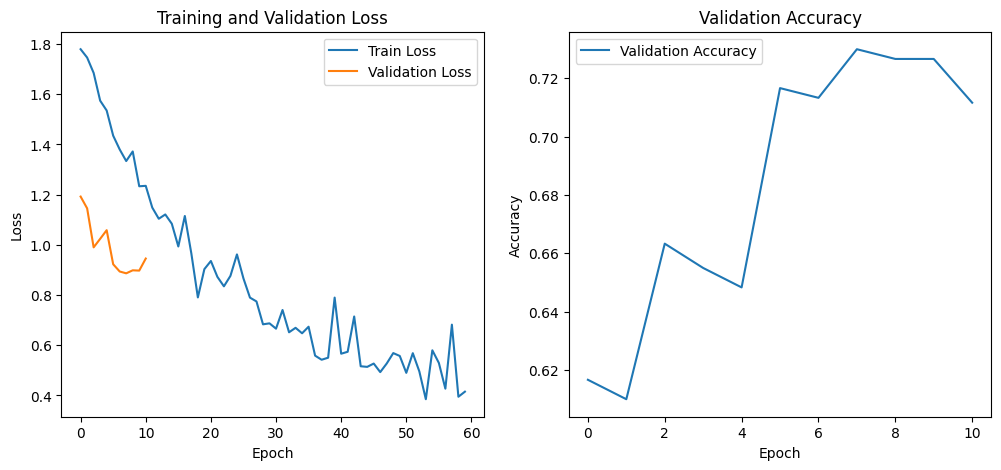

In [19]:
# Define the model
from transformers import Wav2Vec2FeatureExtractor, Wav2Vec2ForSequenceClassification, TrainingArguments, Trainer, TrainerCallback
from datasets import Dataset, load_metric
import pandas as pd
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


num_labels=6
# Define the model
model = Wav2Vec2ForSequenceClassification.from_pretrained("facebook/hubert-base-ls960", num_labels=num_labels)

# Custom callback to log metrics
class LoggingCallback(TrainerCallback):
    def __init__(self):
        self.train_loss = []
        self.eval_loss = []
        self.train_acc = []
        self.eval_acc = []

    def on_log(self, args, state, control, logs=None, **kwargs):
        if "loss" in logs:
            self.train_loss.append(logs["loss"])
        if "eval_loss" in logs:
            self.eval_loss.append(logs["eval_loss"])
        if "eval_accuracy" in logs:
            self.eval_acc.append(logs["eval_accuracy"])
        if "accuracy" in logs:
            self.train_acc.append(logs["accuracy"])

# Initialize the custom callback

# Define accuracy metric
accuracy_metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy_metric.compute(predictions=predictions, references=labels)

# Initialize the custom callback
logging_callback = LoggingCallback()

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_train_epochs=10,
    logging_dir="./logs",
    logging_steps=10,
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics,
    callbacks=[logging_callback],
)
# Training
trainer.train()

# Evaluation
trainer.evaluate(test_dataset)

# Plotting loss and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(logging_callback.train_loss, label="Train Loss")
plt.plot(logging_callback.eval_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(logging_callback.eval_acc, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy")
plt.legend()

plt.show()

Classification Report:
               precision    recall  f1-score   support

           A       0.90      0.73      0.81       212
           F       0.67      0.29      0.40         7
           H       0.55      0.42      0.48        40
           N       0.65      0.94      0.77       206
           S       0.73      0.46      0.56        90
           W       0.49      0.42      0.45        45

    accuracy                           0.71       600
   macro avg       0.66      0.54      0.58       600
weighted avg       0.73      0.71      0.70       600



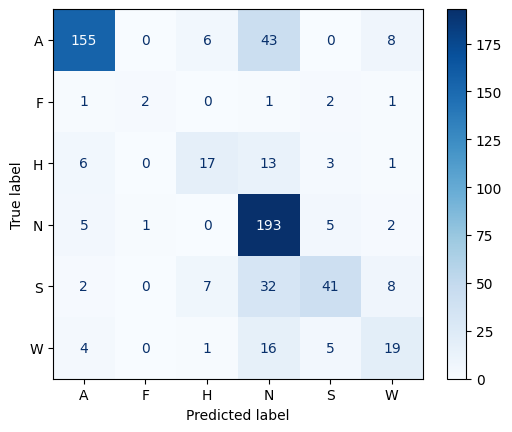

In [20]:

# Make predictions on the test set
predictions = trainer.predict(test_dataset)
preds = np.argmax(predictions.predictions, axis=-1)

# Generate classification report
class_names = label_encoder.classes_  # Get the names of the classes
report = classification_report(test_dataset["labels"], preds, target_names=class_names)
print("Classification Report:\n", report)

# Generate confusion matrix
cm = confusion_matrix(test_dataset["labels"], preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()



## Wav2vec er english

In [21]:
# Define the map_to_array function
from transformers import Wav2Vec2FeatureExtractor
from datasets import Dataset
import librosa
def map_to_array(example):
    speech, _ = librosa.load(example["path"], sr=16000, mono=True)
    example["speech"] = speech
    return example

# Assuming train_df, test_df, val_df are pandas DataFrames with 'path' and 'labels' columns
train_data = Dataset.from_pandas(train_df).map(map_to_array)
test_data = Dataset.from_pandas(test_df).map(map_to_array)
val_data = Dataset.from_pandas(val_df).map(map_to_array)

# Preprocessing function to extract features
def preprocess_function(examples):
    audio = examples["speech"]
    inputs = feature_extractor(audio, sampling_rate=16000, padding=True, truncation=True,max_length=16000)
    inputs["labels"] = examples["labels"]
    return inputs

# Apply preprocessing
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("r-f/wav2vec-english-speech-emotion-recognition")

train_encodings = train_data.map(preprocess_function, remove_columns="speech", batched=True)
test_encodings = test_data.map(preprocess_function, remove_columns="speech", batched=True)
val_encodings = val_data.map(preprocess_function, remove_columns="speech", batched=True)

train_dataset = train_encodings.with_format("torch")
test_dataset = test_encodings.with_format("torch")
val_dataset = val_encodings.with_format("torch")



Map:   0%|          | 0/3810 [00:00<?, ? examples/s]

Map:   0%|          | 0/600 [00:00<?, ? examples/s]

Map:   0%|          | 0/600 [00:00<?, ? examples/s]

preprocessor_config.json:   0%|          | 0.00/262 [00:00<?, ?B/s]

Map:   0%|          | 0/3810 [00:00<?, ? examples/s]

Map:   0%|          | 0/600 [00:00<?, ? examples/s]

Map:   0%|          | 0/600 [00:00<?, ? examples/s]

config.json:   0%|          | 0.00/2.71k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.27G [00:00<?, ?B/s]

Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at r-f/wav2vec-english-speech-emotion-recognition and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch,Training Loss,Validation Loss,Accuracy
1,1.299700,1.102355,0.633333
2,1.003200,0.921434,0.705000
3,0.655900,0.794584,0.748333
4,0.506800,0.740383,0.775000
5,0.421700,0.744089,0.768333
6,0.371800,0.734395,0.776667
7,0.345100,0.735375,0.778333
8,0.288500,0.735842,0.775000
9,0.238700,0.749170,0.783333
10,0.307000,0.740027,0.780000


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,


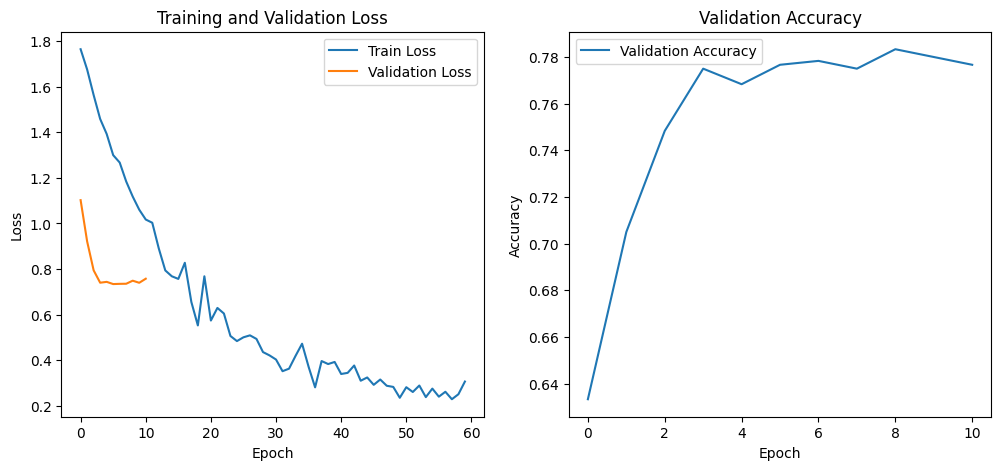

In [22]:
# Define the model
from transformers import Wav2Vec2FeatureExtractor, Wav2Vec2ForSequenceClassification, TrainingArguments, Trainer, TrainerCallback
from datasets import Dataset, load_metric
import pandas as pd
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
from transformers import HubertModel
import torch
import torch.nn as nn
import numpy as np
from transformers import HubertModel, Trainer, TrainingArguments
from datasets import load_metric

num_labels=6
model = Wav2Vec2ForSequenceClassification.from_pretrained("r-f/wav2vec-english-speech-emotion-recognition", num_labels=num_labels)

# Custom callback to log metrics
class LoggingCallback(TrainerCallback):
    def __init__(self):
        self.train_loss = []
        self.eval_loss = []
        self.train_acc = []
        self.eval_acc = []

    def on_log(self, args, state, control, logs=None, **kwargs):
        if "loss" in logs:
            self.train_loss.append(logs["loss"])
        if "eval_loss" in logs:
            self.eval_loss.append(logs["eval_loss"])
        if "eval_accuracy" in logs:
            self.eval_acc.append(logs["eval_accuracy"])
        if "train_accuracy" in logs:
            self.train_acc.append(logs["train_accuracy"])

# Initialize the custom callback

# Define accuracy metric
accuracy_metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy_metric.compute(predictions=predictions, references=labels)

# Initialize the custom callback
logging_callback = LoggingCallback()

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_train_epochs=10,
    logging_dir="./logs",
    logging_steps=10,
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics,
    callbacks=[logging_callback],
)
# Training
trainer.train()

# Evaluation
trainer.evaluate(test_dataset)

# Plotting loss and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(logging_callback.train_loss, label="Train Loss")
plt.plot(logging_callback.eval_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(logging_callback.eval_acc, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy")
plt.legend()

plt.show()

Classification Report:
               precision    recall  f1-score   support

           A       0.90      0.81      0.85       212
           F       0.25      0.14      0.18         7
           H       0.78      0.53      0.63        40
           N       0.71      0.89      0.79       206
           S       0.70      0.72      0.71        90
           W       0.83      0.56      0.67        45

    accuracy                           0.78       600
   macro avg       0.70      0.61      0.64       600
weighted avg       0.79      0.78      0.77       600



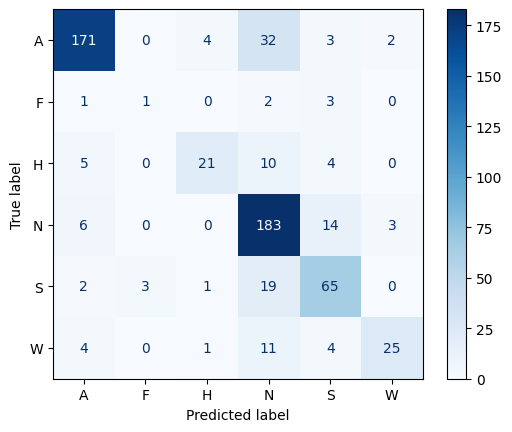

In [23]:

# Make predictions on the test set
predictions = trainer.predict(test_dataset)
preds = np.argmax(predictions.predictions, axis=-1)

# Generate classification report
class_names = label_encoder.classes_  # Get the names of the classes
report = classification_report(test_dataset["labels"], preds, target_names=class_names)
print("Classification Report:\n", report)

# Generate confusion matrix
cm = confusion_matrix(test_dataset["labels"], preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()



# Classic Machine Learning

In [24]:
import librosa
import numpy as np

def extract_features(file_path, mfcc=True, chroma=True, mel=True):
    with open(file_path, 'rb') as f:
        try:
            audio, sr = librosa.load(f)
            features = []
            if mfcc:
                mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13).T, axis=0)
                features.extend(mfccs)
            if chroma:
                chroma = np.mean(librosa.feature.chroma_stft(y=audio, sr=sr).T, axis=0)
                features.extend(chroma)
            if mel:
                mel = np.mean(librosa.feature.melspectrogram(y=audio, sr=sr).T, axis=0)
                features.extend(mel)
        except Exception as e:
            print(f"Error encountered while parsing file: {file_path}")
            return None

    return features


In [25]:
# Load data for training, validation, and testing
def load_data_from_df(df):
    X = []
    y = []
    for index, row in df.iterrows():
        file_path = row['path']  # Assuming 'file_path' is the column name for audio file paths
        emotion_label = row['emotion']  # Assuming 'emotion' is the column name for emotion labels
        features = extract_features(file_path)
        if features is not None:
            X.append(features)
            y.append(emotion_label)
    return X, y
X_train, y_train = load_data_from_df(train_df)
X_val, y_val = load_data_from_df(val_df)
X_test, y_test = load_data_from_df(test_df)

## SVM

Test Accuracy: 0.6166666666666667
Classification Report:
              precision    recall  f1-score   support

           A       0.78      0.75      0.76       212
           F       0.06      0.14      0.08         7
           H       0.18      0.35      0.24        40
           N       0.75      0.69      0.72       206
           S       0.59      0.46      0.51        90
           W       0.31      0.27      0.29        45

    accuracy                           0.62       600
   macro avg       0.44      0.44      0.43       600
weighted avg       0.66      0.62      0.63       600



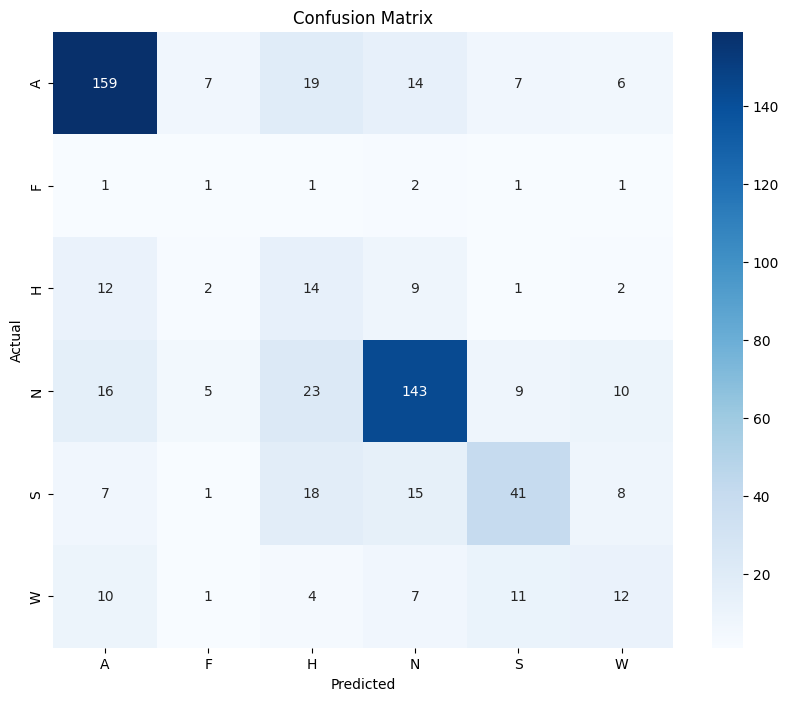

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Initialize SVM classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train SVM model
svm_model.fit(X_train, y_train)

# Predict on test set
y_pred_test = svm_model.predict(X_test)

# Evaluate test accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy}")

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Logistic regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Test Accuracy: 0.5816666666666667
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           A       0.86      0.65      0.74       212
           F       0.02      0.14      0.04         7
           H       0.16      0.30      0.21        40
           N       0.73      0.65      0.69       206
           S       0.58      0.54      0.56        90
           W       0.28      0.33      0.31        45

    accuracy                           0.58       600
   macro avg       0.44      0.44      0.42       600
weighted avg       0.67      0.58      0.62       600



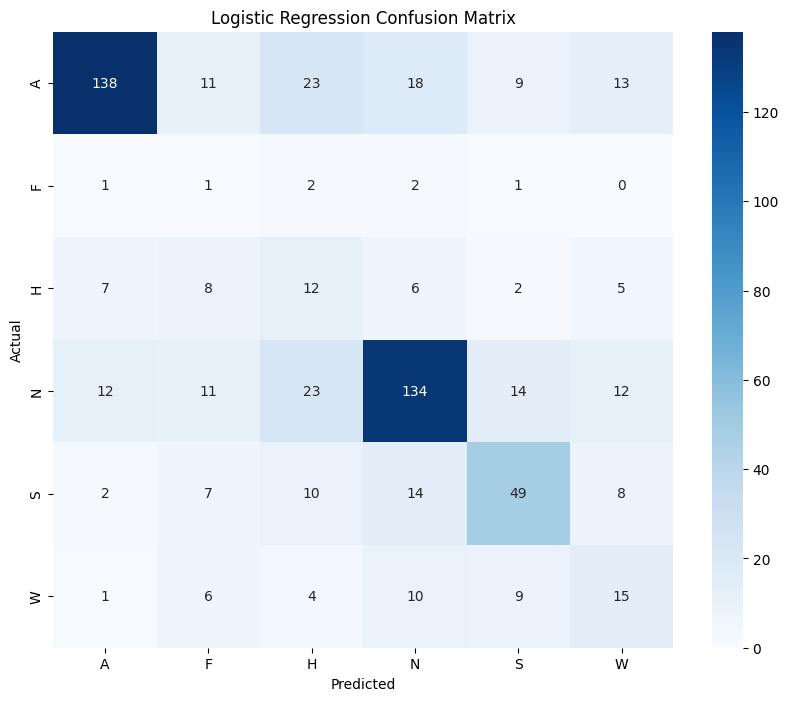

In [27]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression classifier
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train Logistic Regression model
logreg_model.fit(X_train, y_train)

# Predict on test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate test accuracy
test_accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Test Accuracy: {test_accuracy_logreg}")

# Generate classification report for Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Generate confusion matrix for Logistic Regression
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=logreg_model.classes_, yticklabels=logreg_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


## naive Bayes

Naive Bayes Test Accuracy: 0.5133333333333333
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           A       0.84      0.55      0.67       212
           F       0.00      0.00      0.00         7
           H       0.10      0.20      0.13        40
           N       0.55      0.80      0.65       206
           S       0.35      0.14      0.20        90
           W       0.33      0.13      0.19        45

    accuracy                           0.51       600
   macro avg       0.36      0.30      0.31       600
weighted avg       0.57      0.51      0.51       600



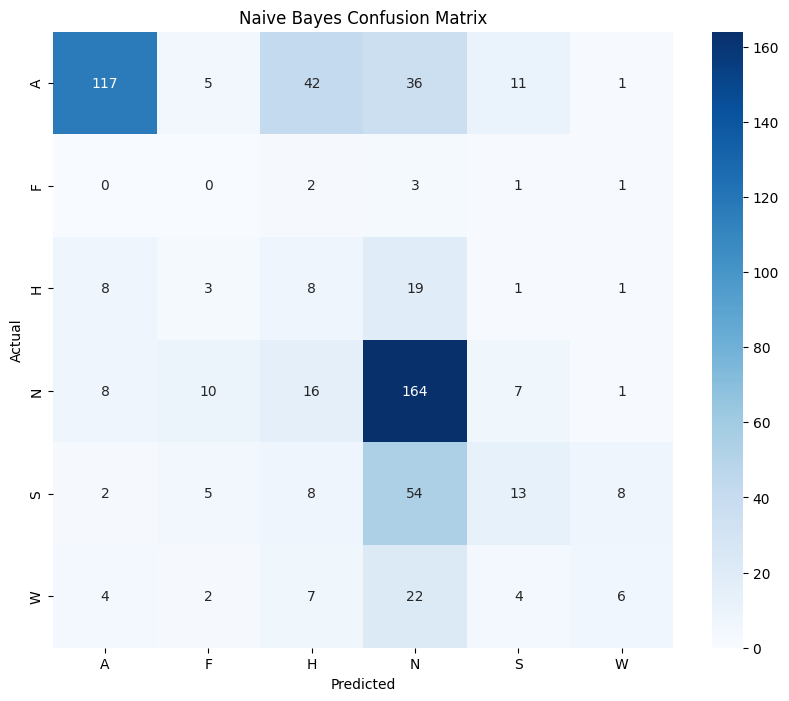

In [28]:
from sklearn.naive_bayes import GaussianNB

# Initialize Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Train Naive Bayes model
nb_model.fit(X_train, y_train)

# Predict on test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate test accuracy
test_accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Test Accuracy: {test_accuracy_nb}")

# Generate classification report for Naive Bayes
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Generate confusion matrix for Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()


## Simple Neural network

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               39424     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 6)                 774       
                                                                 
Total params: 73094 (285.52 KB)
Trainable params: 73094 (285.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
120/120

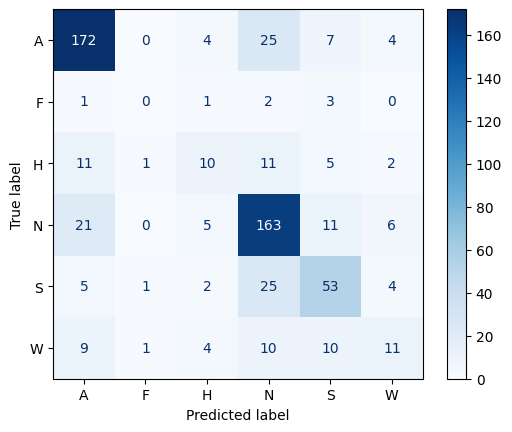

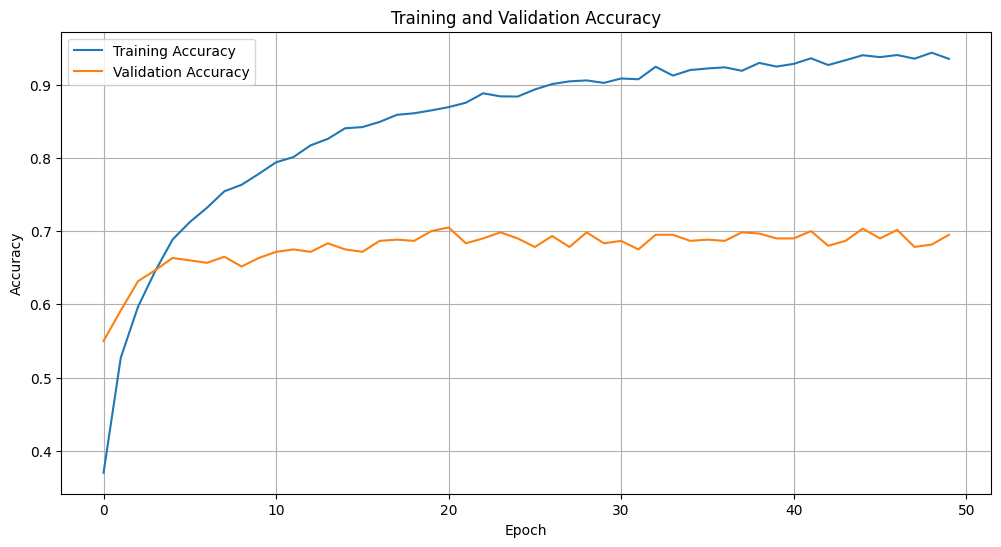

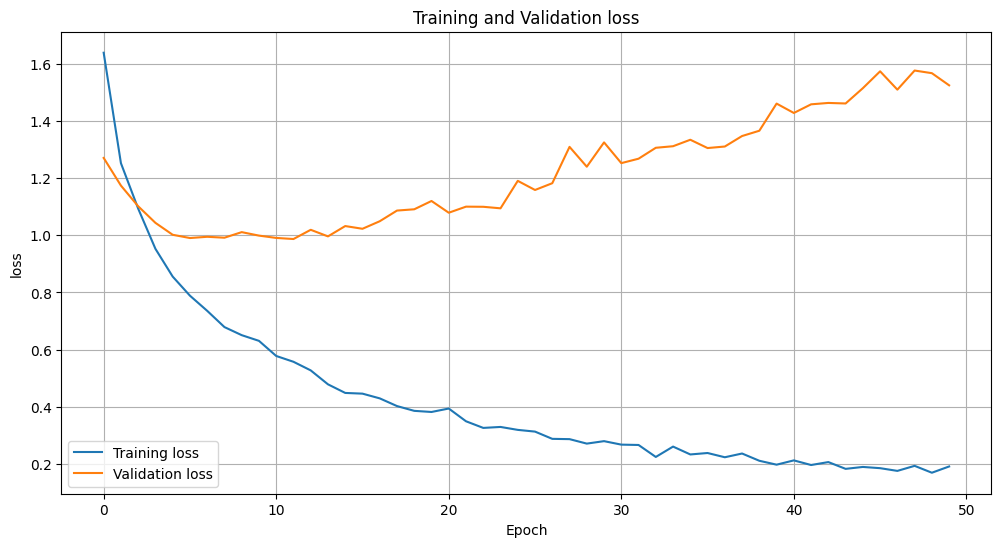

In [29]:
# Normalize features (optional but recommended for neural networks)
import librosa
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test =label_encoder.transform(y_test)
y_val =label_encoder.transform(y_val)

# Build a neural network model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y_train)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    verbose=1)

# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy}")

# Predict on test set
y_pred_nn = np.argmax(model.predict(X_test), axis=-1)
class_names = label_encoder.classes_  # Get the names of the classes

# Generate classification report for Neural Network
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn,target_names=class_names))

# Generate confusion matrix for Neural Network
cm = confusion_matrix(y_test, y_pred_nn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()